<a href="https://colab.research.google.com/github/csanyika/Python_assignments/blob/main/FinalExam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

QUESTION 1

In [ ]:
math = pd.read_csv("student_math_clean.csv")
lang = pd.read_csv("student_portuguese_clean.csv")

(a)
Using the Portugese language data set for the question. Consider students only if they are at least 18 years or older. For these students, they each received a grade 1 and a grade 2. Create a variable for each student that is the larger of these two scores. Then find the average score of this maximum grouping by the combination of mother job and father job. Of these combinations (i.e. mother job and father job) with more than 5 cases, what combination of jobs had the highest average of the larger of their two test scores?

In [ ]:
#filter for students 18 and older
lang_adj = lang[lang["age"]>= 18]
#max grade between exams
lang_adj.loc[:, 'max_grade'] = lang_adj[["grade_1", "grade_2"]].max(axis=1)
#mean and count for each group
lang_adj = lang_adj.groupby(["father_job", "mother_job"]).agg(ave_score=("max_grade","mean"),
                                                              cases = ("max_grade", "size")).reset_index()
#filter cases>5 and select top average score
lang_adj[lang_adj["cases"]>5].sort_values(by="ave_score", ascending=False).head(1)

<ipython-input-3-b7e5afc3ee0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_adj.loc[:, 'max_grade'] = lang_adj[["grade_1", "grade_2"]].max(axis=1)


,father_job,mother_job,ave_score,cases
16,services,teacher,13.428571,7


(b)
Using the math data set, find the mean age by sex and school. Then compute the mean final score by sex and school. Then present the results in a table where each row is a school and each column is an average of the particular variable for one sex (i.e. the first column is mean age females, the second column is mean age males, etc.).

In [ ]:
#calculate average age by sex and school
age_mean = math.groupby(["sex","school"]).agg(mean_age = ("age", "mean"))
#calculate average final grade by sex and school
score_mean = math.groupby(["sex","school"]).agg(mean_score = ("final_grade", "mean"))

#join by sex and school and pivot wider
combined = pd.merge(score_mean, age_mean, on = ["sex", "school"], how = "left").reset_index()
pd.pivot(combined, index="school", columns="sex", values=["mean_age", "mean_score"])

mean_age            mean_score           
sex             F          M          F          M
school                                            
GP      16.579235  16.457831   9.972678  11.060241
MS      17.840000  18.238095   9.920000   9.761905

(c) Exactly reproduce the provided plot.

<ipython-input-5-ad84c9528c5a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lang_timeGrade["subject"] = "port"
<ipython-input-5-ad84c9528c5a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  math_timeGrade["subject"] = "math"
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the boxplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2500x1500 with 0 Axes>

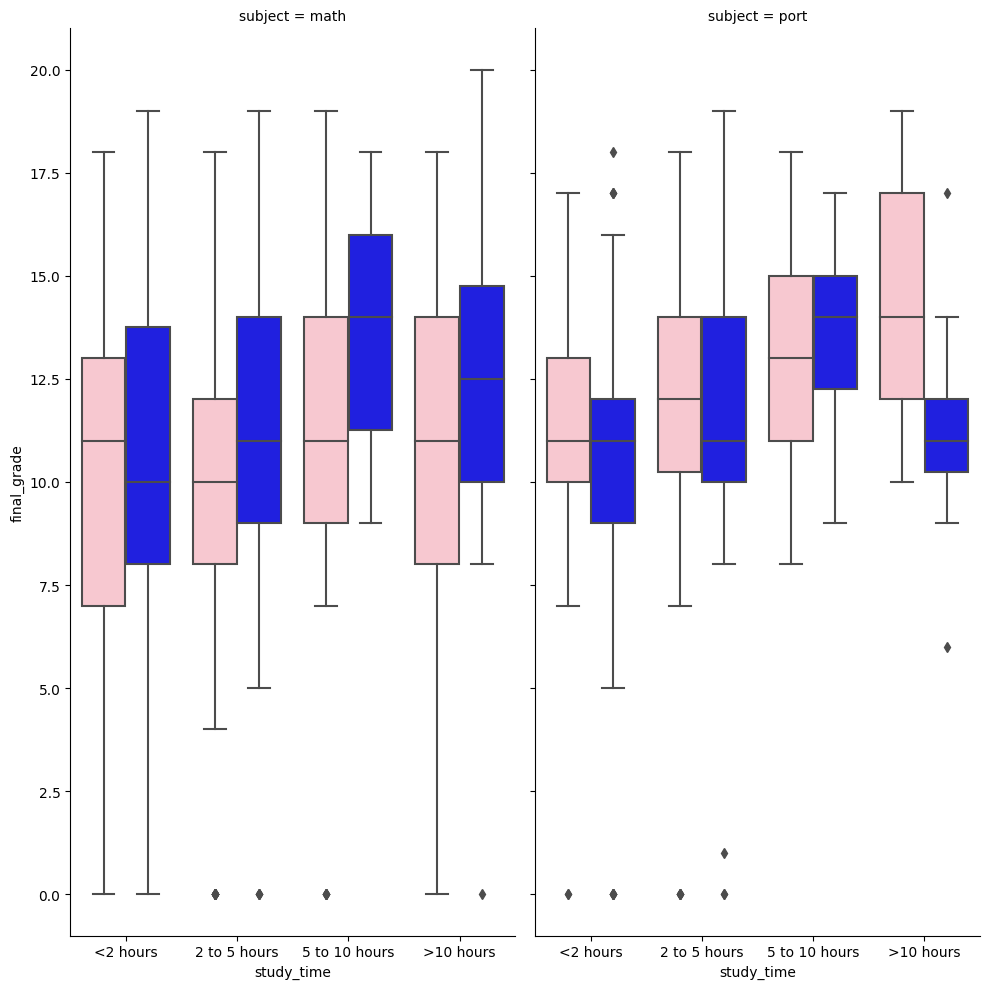

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(25,15))

#select relevant columns and add column to state the subject
lang_timeGrade = lang[["sex", "study_time", "final_grade"]]
lang_timeGrade["subject"] = "port"
math_timeGrade = math[["sex", "study_time", "final_grade"]]
math_timeGrade["subject"] = "math"

#stack the two data frames on top of each other
school = pd.concat([math_timeGrade, lang_timeGrade], ignore_index=True)
#set the order of study_time for it to display on the x axis
order_time = ["<2 hours", "2 to 5 hours", "5 to 10 hours", ">10 hours"]

#create plot with final_grade as a response to study_time and stratify by sex
sns.FacetGrid(school, col="subject", height=10, aspect=.5
              ).map(sns.boxplot,
                    'study_time',
                    'final_grade',
                    'sex',
                    order=order_time,
                    palette=dict(M="blue", F="pink"))


(d) Using the math scores data set, for each grade on the first exam, find the average grade on the final exam for all the students who had the same score on exam one. That is, for all students who score, for example, a 10 on the first exam, what was the average final score for this group of students. Do this for all grades on the first exam. Repeat this for the second exam (i.e. For each grade on the second exam, find the average grade on the final exam for all the students who had the same score on exam two). Plot the exam score (first or second) on the x-axis and the average final score on the y-axis using color to indicate whether the point was the first or second exam.

<Axes: xlabel='grade', ylabel='final'>

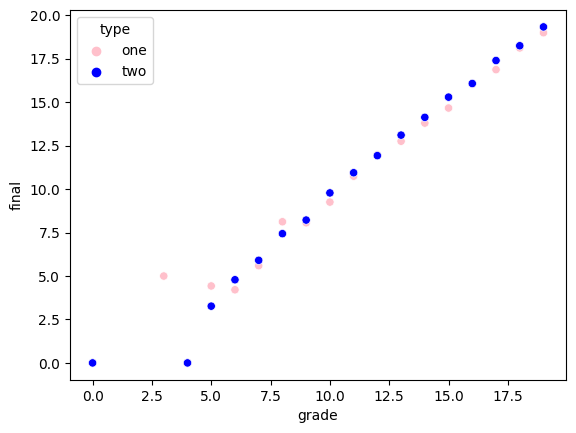

In [ ]:
#calculate the mean of grade_1 and add a variable that states the exam number
one = math.groupby("grade_1").agg(final = ("final_grade", "mean")).reset_index()
one["type"] = "one"
 #rename the variable in preparation for stacking
one.rename(columns={"grade_1":"grade"}, inplace=True)
#calculate the mean of grade_2 and add a variable that states the exam number
two = math.groupby("grade_2").agg(final = ("final_grade", "mean")).reset_index()
two["type"] = "two"
#rename the variable in preparation for stacking
two.rename(columns={"grade_2":"grade"}, inplace=True)

#stack the data frames on top of each other
allgrade = pd.concat([one, two], ignore_index=True)

#create plot of final as a response to grade
sns.scatterplot(x=allgrade.grade, y=allgrade.final, hue= allgrade.type, palette=dict(one="pink", two="blue"))

QUESTION 2 -
Answer these questions using the spotify dataset.

(a) Plot a line plot of the release year on the x-axis and the number of songs released in this year on the y-axis.

<Axes: xlabel='release_year', ylabel='song_num'>

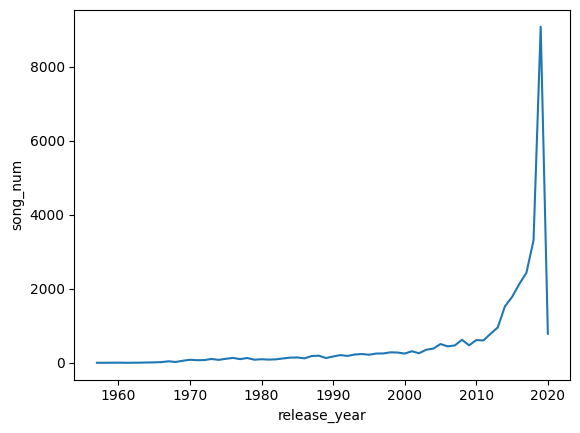

In [ ]:
from datetime import datetime
spot = pd.read_csv("spotify_songs.csv")

#convert to datetime type
spot["track_album_release_date"] = pd.to_datetime(spot["track_album_release_date"])

#add column for date year
spot["release_year"] = spot["track_album_release_date"].dt.year
#count songs in each year
release = spot.groupby("release_year").size().reset_index(name = "song_num")

#plot
sns.lineplot(x=release.release_year, y=release.song_num)

(b) Remove all the songs that only have the release year (as opposed to the full date of release). For each release month, find the 5 most danceable songs (higher scores are better). This will give you a list of 60 total songs (i.e. 12 months times 5 songs each month equals 60). Of these 60 songs, what is the name of the playlist that contains the song with the highest tempo? Of the same 60 songs, what is the name of the playlist that contains the sond with the lowest tempo? Finally, what is the most common genre among these 60 songs, and how many songs below to that genre?

In [ ]:
#filter for rows where the release date is in YYYY-MM-DD format
spot_filtered = spot[spot["track_album_release_date"].dt.strftime(
    "%Y-%m-%d")== spot["track_album_release_date"]]
#add variable for release month
spot_filtered["release_month"] = spot["track_album_release_date"].dt.month
#select songs with top 5 danceability scores for each month
topDance = spot_filtered.groupby("release_month").apply(
    lambda x: x.nlargest(5, 'danceability'))

high_tempo = topDance.sort_values(by="tempo", ascending = False)[
    ["playlist_name", "tempo"]].head(1)
print("Highest Tempo:", high_tempo)

low_tempo = topDance.sort_values(by="tempo", ascending = True)[
    ["playlist_name", "tempo"]].head(1)
print("Lowest Tempo:", low_tempo)

comm_genre = topDance.groupby("playlist_genre").size() \
  .reset_index(name = "num_songs").sort_values(by="num_songs", ascending = False).head(1)
print("Common Genre:", comm_genre)


Highest Tempo:                                               playlist_name    tempo
release_month                                                       
2             7095  Dirty South Rap Classics by DJ HOTSAUCE  138.843
Lowest Tempo:                    playlist_name    tempo
release_month                            
9             9981     Zona Trap  103.012
Common Genre:   playlist_genre  num_songs
4            rap         27


(c) You are a wedding DJ and you are working with a night- mare couple and they have a lot of very specific requests. They want their first dance to be exactly 10 minutes long and consist of two back to back songs (they cannot be the same song!) by the artist Depeche Mode. Find the two Depeche Mode songs in this data set when played back to back the duration is as close as possible to 10 minutes.

In [ ]:
#filter for artist and select the relevant columns
DM_songs = spot[spot["track_artist"] == "Depeche Mode"][["track_name", "duration_ms"]]
#prepare for cross join
DM_songs["key"] = 1
#create a duplicate
DM_songs2 = DM_songs

#cross join the two data frames
DM_merg = pd.merge(DM_songs, DM_songs2, on="key")

#sum the durations and convert to minutes by dividing by 60000
DM_merg["minutes"] = (DM_merg["duration_ms_x"] + DM_merg["duration_ms_y"])/60000
#filter for row where minutes are closest to 10
close_to_10 = DM_merg.loc[(DM_merg["minutes"]-10).abs().idxmin(), "minutes"]
DM_merg[DM_merg["minutes"]==close_to_10]

#selected songs: Strangelove - 7" Version and Enjoy The Silence - 2006 Remastered Version

,track_name_x,duration_ms_x,key,track_name_y,duration_ms_y,minutes
842,"Strangelove - 7"" Version",227413,1,Enjoy The Silence - 2006 Remastered Version,372813,10.003767
908,Enjoy The Silence - 2006 Remastered Version,372813,1,"Strangelove - 7"" Version",227413,10.003767
